In [1]:
#%pip install --ignore-installed --upgrade tensorflow 
#%pip install opencv-python
#%pip install --upgrade albumentations --user
#%pip install pandas
#%pip install numpy
#%pip install matplotlib


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import vgg19
import albumentations as A # used for image augmentation
from PIL import Image #used for importing images
import re
import os,glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, TensorBoard




In [3]:
data = pd.read_csv('./Genshin_Dataset.csv')
data.head()

,Name,Model,Region,Vision,Weapon,Revenue,Year Released
0,Albedo,https://i.postimg.cc/vHqgw9cj/unnamed.jpg,Mondstadt,Geo,Sword,"$11,816,107",2021
1,Ayaka,https://i.postimg.cc/mZP9x58Q/ayaka.jpg,Inazuma,Cryo,Sword,"$16,451,006",2021
2,Ayato,https://i.postimg.cc/3JpDNDMN/ayato.jpg,Inazuma,Hydro,Sword,"$14,481,796",2022
3,Childe (Tartaglia),https://i.postimg.cc/RZBJHV9R/childe.jpg,Liyue,Hydro,Bow,"$13,443,619",2020
4,Cyno,https://i.postimg.cc/bNHN40cx/cyno.jpg,Sumeru,Electro,Polearm,"$13,797,833",2022


In [4]:
# given the filepath to the image, we can visualize the image
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [5]:
# transformations
vertical_transform = A.Compose([A.VerticalFlip(p=1)])
horizontal_transform = A.Compose([A.HorizontalFlip(p=1)])
#clahe_transform = A.Compose([A.CLAHE(p=1)]) # enhances the picture's contrast and brightness


In [6]:
revenues = data['Revenue']
revenues = revenues.map(lambda x: int(re.sub(",", "", x[1:]))) # removes $ and commas from the revenue

In [7]:
# iterates over the character images in the folder 
# returns a tuple where the 3rd element is a list of the character names
images_arr = []
revenue_arr = []
counter = 0
for e_image in os.walk('./Genshin Characters/'):
    #print(e_image)

    # iterates over the list of the character names
    for img_name in e_image[2]:
        #curr = []
        file_path = './Genshin Characters/{}'.format(img_name)
        image = cv2.imread(file_path, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (200, 200))#, interpolation=cv2.INTER_AREA)
        
        ###image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = np.array(image)
        image = image.astype('float32')
        image /= 255
        
        
        
        #curr.append(image)
        # transform function takes in the image as the parameter
        # the output is a dictionary with 'image' as the key and the transformed image as the value
        # so, we extract the value by giving it the key
        ##vertical_image = vertical_transform(image=image)['image'] 
        ##horizontal_image = horizontal_transform(image=image)['image']
        ##both_image = horizontal_transform(image=vertical_image)['image']
        #clahe_image = clahe_transform(image=image)['image']
        #visualize(image) 
        #visualize(vertical_image)
        #visualize(horizontal_image)
        #visualize(both_image)
        #visualize(clahe_image)
        #curr.append(vertical_image)
        #curr.append(horizontal_image)
        #curr.append(both_image)
        images_arr.append(image)
        ##images_arr.append(vertical_image)
        ##images_arr.append(horizontal_image)
        ##images_arr.append(both_image)
        ##revenue_arr.append(revenues[counter])
        ##revenue_arr.append(revenues[counter])
        ##revenue_arr.append(revenues[counter])
        revenue_arr.append(revenues[counter])
        counter += 1

        
    



In [8]:
model = vgg19.VGG19(include_top=False,weights = 'imagenet', input_shape=(200, 200,3),pooling='avg')
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [9]:
print(len(revenue_arr))
print(len(images_arr))

24
24


In [10]:
#len(images_arr)
#images_arr1 = np.array(images_arr)
#revenue_arr1 = np.array(revenue_arr)
#images_arr2=np.asarray(images_arr).astype(object)
#revenue_arr2 = np.asarray(revenue_arr).astype(object)

img_train, img_test, rev_train, rev_test = train_test_split(images_arr, revenue_arr, test_size=0.2, shuffle = True, random_state = 20)
#model.compile(loss="mse", optimizer=keras.optimizers.Adadelta())
#print(images_arr)
#print(img_train)
#print(img_test)
#print(rev_train.shape)
#print(rev_test.shape)
#img_train_tf = tf.convert_to_tensor(img_train, dtype = object)
#data_set = tf.data.Dataset.from_tensor_slices(img_train, rev_train)

#model=tf.keras.Sequential(
       # [
        #    tf.keras.layers.InputLayer(input_shape=(200,200, 3)),
        #    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
         #   tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
         #   tf.keras.layers.Flatten()
      #  ])
            #tf.keras.layers.Dense(34000000)
        
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
model.fit(np.array(img_train, np.float32), np.array(list(map(int, rev_train)), np.float32), epochs=2)



Epoch 1/2
1/1 [==============================] - 15s 15s/step - loss: 15206370.0000 - accuracy: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 11s 11s/step - loss: 15205447.0000 - accuracy: 0.0000e+00


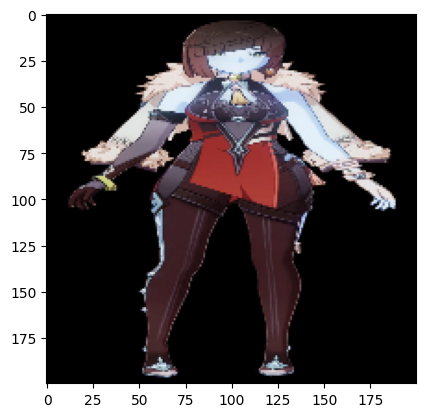

In [15]:
plt.imshow(img_train[0])

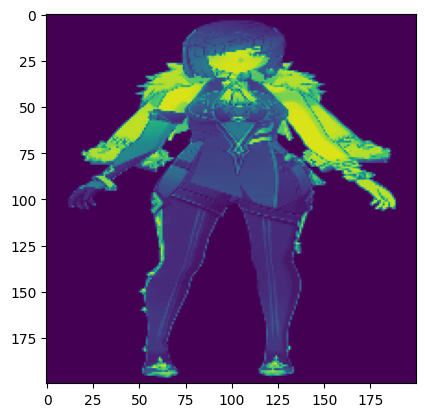

In [19]:
x_train = np.array(img_train).astype(np.float32)
x_train = x_train.reshape(19, 200*200, 3)
x_train = x_train[:, :, 1] # only green spectrum
plt.imshow(x_train[0].reshape(200,200))

In [20]:
x_train.shape


(19, 40000)

In [27]:
n_classes = 2 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(n_classes))
model.add(tf.keras.layers.Softmax()) # softmax takes some input _> some probabiltiy distribution
# you cna use cross entropy as your loss
# your final layer a single output neuron -> that holds what ever the regression prediction is
# for classification your final layer is n_classes of neurons -> where accuracy is argmax(final_layer) is the class


In [28]:
model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
y_train = np.zeros((x_train.shape[0], 1)).astype(np.int32)

In [30]:
model.fit(x_train, y_train)

1/1 [==============================] - 1s 994ms/step - loss: 0.7082 - accuracy: 0.1579


In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               5120128   
                                                                 
 re_lu_2 (ReLU)              (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 re_lu_3 (ReLU)              (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
 softmax_1 (Softmax)         (None, 2)                 0         
                                                                 
Total params: 5,136,898
Trainable params: 5,136,898
No